# Test Notebook on small instances 

This notebook aims to test the whole algorithm on small instances (**5** to **10 customers** with default Charging stations).
After that, plots and validation functions will be employed to ensure the real feasibility of the solutions given by the solver.

In [2]:
# Libraries Import
import os, sys, json, math, traceback
import numpy as np
import matplotlib.pyplot as plt

# BCP 
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
src_path = os.path.join(project_root, 'src')
if src_path not in sys.path:
    sys.path.insert(0, src_path)

from bcp_solver import BCPSolver
from utils import load_instance, PiecewiseLinearFunction, get_travel_time_and_consumption  

# test_utilities
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
utils_path = os.path.join(project_root, 'utils')

if utils_path not in sys.path:
    sys.path.insert(0, utils_path)

from test_utilities import simple_external_feasibility_check, plot_instance_and_routes

save_path = os.path.join(project_root, 'results', 'test')


## 5 Customers 

In [ ]:
# Load instance from json
INSTANCE_PATH_5 = os.path.join(project_root, "data", "TDEVRPTW", "test", "c208C5_td.json") 
#INSTANCE_PATH_5 = os.path.join(project_root, "data", "TDEVRPTW", "test", "c206C5_td.json") 
#INSTANCE_PATH_5 = os.path.join(project_root, "data", "TDEVRPTW", "test", "r203C5_td.json") 

if not os.path.exists(INSTANCE_PATH_5):
    raise FileNotFoundError(f"Instance not found: {INSTANCE_PATH_5}")

instance = load_instance(INSTANCE_PATH_5)


In [5]:
# Call the solver

try:
    solver = BCPSolver(INSTANCE_PATH_5, num_processes=1)
    result = solver.solve()  
except Exception as e:
    print("Errore nel solver:", e)
    traceback.print_exc()
    raise

best_cost = result.get("best_cost", None)
best_solution = result.get("best_solution", None)
feas_report = result.get("feasibility_report", None)

print("\n=== Results: ===")
print("Best cost:", best_cost)
print("Routes found:", len(best_solution) if best_solution else 0)
print("Feasible (internal check):", feas_report["feasible"] if feas_report else None)
if feas_report and not feas_report["feasible"]:
    print("Reason:", feas_report["reason"])


--- Initializing Parallel BCP Solver ---
Using 1 processes for pricing.

--- Exploring B&B Node #1 ---
  Constraints: {}
Set parameter Username
Set parameter LicenseID to value 2663559
Academic license - for non-commercial use only - expires 2026-05-11
[RMP] Obj=5000000.000000 | cols=5
Running pricing heuristics in parallel...
Added 10 new columns from heuristics.
[RMP] Obj=1000127.443934 | cols=15
Running pricing heuristics in parallel...
Added 10 new columns from heuristics.
[RMP] Obj=1000127.443934 | cols=25
Running pricing heuristics in parallel...
Added 10 new columns from heuristics.
[RMP] Obj=1000127.443934 | cols=35
Running pricing heuristics in parallel...
Added 10 new columns from heuristics.
[RMP] Obj=224.005653 | cols=45
Running pricing heuristics in parallel...
Filtered out 0 by branch-constraints, 1 infeasible by physics.
  Cuts: added 4 SRC (k=2) with |S|<= 5.
Added 4 cuts. Re-solving RMP...
[RMP] Obj=270.469372 | cols=45
Running pricing heuristics in parallel...
Filtere

In [19]:
# external check
ext_check = simple_external_feasibility_check(instance, best_solution or [], verbose=True)
print("External feasible:", ext_check["feasible"])
if not ext_check["feasible"]:
    for r in ext_check["reasons"]:
        print(" -", r)

# route table
if best_solution:
    print("\nRoutes (path, value, cost):")
    for i, it in enumerate(best_solution, 1):
        print(f"  #{i:02d}: path={it['route']['path']}, value={it['value']:.3f}, cost={it['route']['cost']:.3f}")

External feasible: True

Routes (path, value, cost):
  #01: path=[0, 8, 6, 5, 10, 5, 0], value=1.000, cost=123.783
  #02: path=[0, 14, 9, 3, 13, 15, 7, 12, 0], value=1.000, cost=120.647
  #03: path=[0, 11, 1, 0], value=1.000, cost=23.324


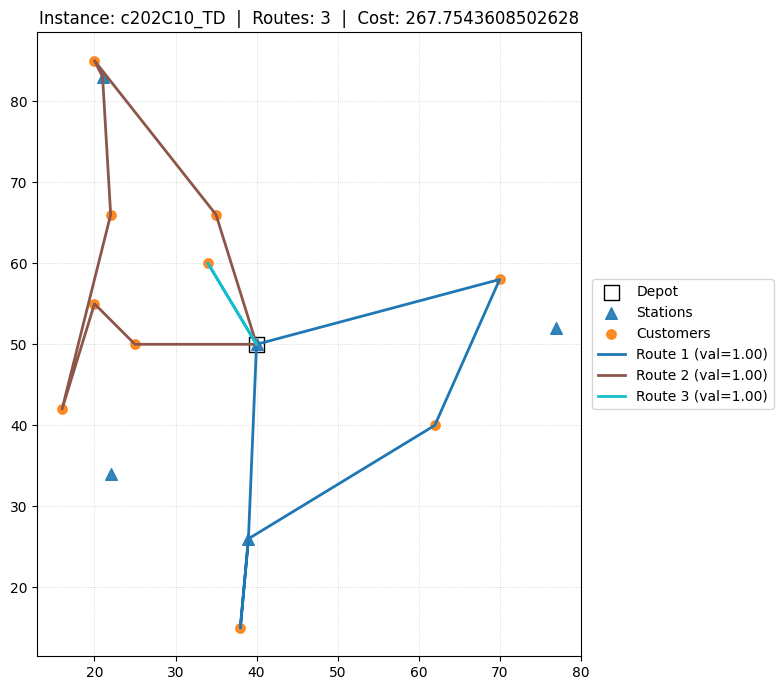

In [20]:
plot_instance_and_routes(instance, best_solution, best_cost, save_path)

## 10 Customers

In [ ]:
# Load instance from json
INSTANCE_PATH_10 = os.path.join(project_root, "data", "TDEVRPTW", "test", "c202C10_td.json") 

if not os.path.exists(INSTANCE_PATH_10):
    raise FileNotFoundError(f"Instance not found: {INSTANCE_PATH_10}")

instance = load_instance(INSTANCE_PATH_10)


In [32]:
# Call the solver

try:
    solver = BCPSolver(INSTANCE_PATH_10, num_processes=1)
    result = solver.solve()  
except Exception as e:
    print("Errore nel solver:", e)
    traceback.print_exc()
    raise

best_cost = result.get("best_cost", None)
best_solution = result.get("best_solution", None)
feas_report = result.get("feasibility_report", None)

print("\n=== Results: ===")
print("Best cost:", best_cost)
print("Routes found:", len(best_solution) if best_solution else 0)
print("Feasible (internal check):", feas_report["feasible"] if feas_report else None)
if feas_report and not feas_report["feasible"]:
    print("Reason:", feas_report["reason"])


--- Initializing Parallel BCP Solver ---
Using 1 processes for pricing.

--- Exploring B&B Node #1 ---
  Constraints: {}
[RMP] Obj=10000000.000000 | cols=10
Running pricing heuristics in parallel...
Added 10 new columns from heuristics.
[RMP] Obj=6000058.329719 | cols=20
Running pricing heuristics in parallel...
Added 10 new columns from heuristics.
[RMP] Obj=6000058.329719 | cols=30
Running pricing heuristics in parallel...
Added 10 new columns from heuristics.
[RMP] Obj=4000162.050526 | cols=40
Running pricing heuristics in parallel...
Added 10 new columns from heuristics.
[RMP] Obj=2000231.368348 | cols=50
Running pricing heuristics in parallel...
Added 10 new columns from heuristics.
[RMP] Obj=1500259.854223 | cols=60
Running pricing heuristics in parallel...
Added 9 new columns from heuristics.
[RMP] Obj=338.000021 | cols=69
Running pricing heuristics in parallel...
Added 10 new columns from heuristics.
[RMP] Obj=336.980369 | cols=79
Running pricing heuristics in parallel...
Added

In [23]:
# external check
ext_check = simple_external_feasibility_check(instance, best_solution or [], verbose=True)
print("External feasible:", ext_check["feasible"])
if not ext_check["feasible"]:
    for r in ext_check["reasons"]:
        print(" -", r)

# route table
if best_solution:
    print("\nRoutes (path, value, cost):")
    for i, it in enumerate(best_solution, 1):
        print(f"  #{i:02d}: path={it['route']['path']}, value={it['value']:.3f}, cost={it['route']['cost']:.3f}")

External feasible: True

Routes (path, value, cost):
  #01: path=[0, 8, 6, 5, 10, 5, 0], value=1.000, cost=123.783
  #02: path=[0, 14, 9, 3, 13, 15, 7, 12, 0], value=1.000, cost=120.647
  #03: path=[0, 11, 1, 0], value=1.000, cost=23.324


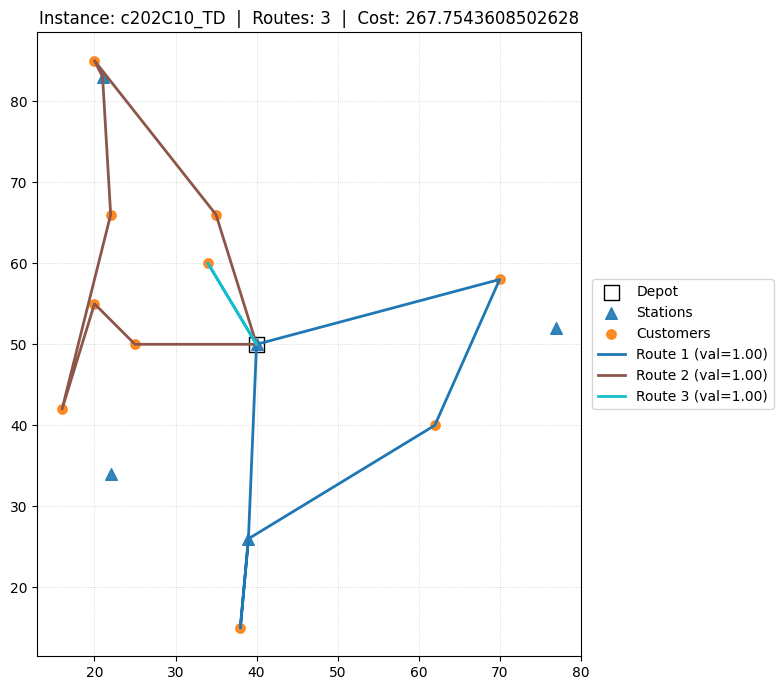

In [24]:
plot_instance_and_routes(instance, best_solution, best_cost, save_path)